<a href="https://colab.research.google.com/github/GreggHeller1/Neuron_Tutorial/blob/main/scripts/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#settings
%load_ext autoreload
%autoreload 2
try:
  import google.colab
  in_colab = True
except:
  in_colab = False
print(in_colab)

False


In [3]:
#installs (for colab only, run this once)
if in_colab:
    ! git clone https://github.com/GreggHeller1/PMT_linearization.git

In [4]:
#local imports
#cwd if in colab for imports to work
if in_colab:
    %cd /content/PMT_linearization

from src import data_io as io
from src import plotting
from src import computation as comp

In [5]:
#imports
from matplotlib import pyplot as plt
import os
import numpy as np

In [72]:
#define paths
#cwd if in colab for file loading to work
if in_colab:
    %cd /content/PMT_linearization/scripts
    
test_path = os.path.join('demo_data', 'test.txt')
print(test_path)
print(os.getcwd())
os.path.exists(test_path)

demo_data/test.txt
/Users/greggoryheller/Documents/code/PMT_linearization/scripts


True

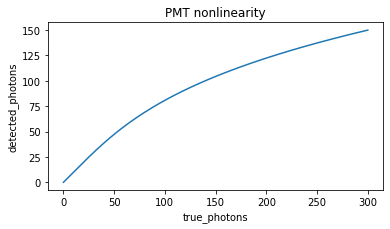

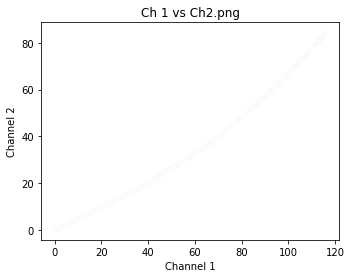

In [120]:
#data inputs
#im = io.imread(fullpath)

x = np.arange(0, 350)
x, y = comp.fake_pmt_n(x)
fig, ax = plotting.plot_pmt_nonlinearity(x, y)



fake_ratio = 2.
fake_true_photons, fake_green_channel = comp.fake_pmt_n(np.arange(0,140,fake_ratio))

fake_x2, fake_red_channel = comp.fake_pmt_n(fake_true_photons/fake_ratio, round=False)
channel_i = 0
channel_j = 1
fig, ax, title = plotting.plot_channels(fake_green_channel, fake_red_channel, channel_i, channel_j)


/Users/greggoryheller/opt/anaconda3/envs/PMT_linearization/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/greggoryheller/opt/anaconda3/envs/PMT_linearization/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


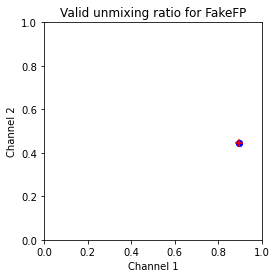

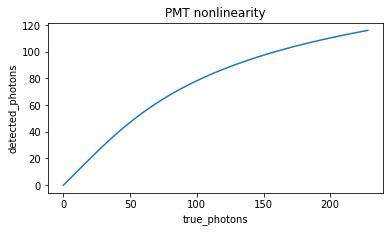

In [121]:
#data manipulation

xs, ys, xs_per_y = comp.get_unmixing_ratio(fake_green_channel, fake_red_channel)
fig, ax, title = plotting.plot_unmixing_vectors(xs, ys, channel_i, channel_j, label='FakeFP', plot=True)

detected_photons, true_photons = comp.compute_PMT_nonlinearity(fake_green_channel, fake_red_channel, xs_per_y)
#whats the best way to handle X possibly being larger than y? we want to get the same curve either way. 

#print(fake_green_channel)
#print(detected_photons)

#print(true_photons)
fig, ax = plotting.plot_pmt_nonlinearity(true_photons, detected_photons)


#fullpath = os.path.join(current_data_dir, file)
#for i in range(im.shape[3]):
#  for j in range(im.shape[3]):

##########
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.
  55.  56.  57.  58.  59.  59.  60.  61.  62.  63.  64.  65.  66.  67.
  67.  68.  69.  70.  71.  72.  73.  74.  74.  75.  76.  77.  78.  79.
  79.  80.  81.  82.  83.  83.  84.  85.  86.  87.  87.  88.  89.  90.
  90.  91.  92.  93.  93.  94.  95.  95.  96.  97.  98.  98.  99. 100.
 100. 101. 102. 102. 103. 104. 104. 105. 106. 106. 107. 108. 108. 109.
 109. 110. 111. 111. 112. 112. 113. 114. 114. 115. 115. 116. 116. 117.
 117. 118. 118. 119. 120. 120. 121. 121. 122. 122. 123. 123. 123. 124.
 124. 125. 125. 126. 126. 127. 127. 128. 128. 128. 129. 129. 130. 130.
 130. 131. 131. 132. 132. 132. 133. 133. 133. 134. 134. 134. 135. 135.
 135. 136. 136. 136. 137. 137. 137. 138. 138. 138. 139. 139. 139. 

 300.         300.         300.         300.         300.        ]
30
[29.         29.11111111 29.22222222 29.33333333 29.44444444 29.55555556
 29.66666667 29.77777778 29.88888889 30.        ]
[29.31187929 29.42948941 29.54709953 29.66470965 29.78231977 29.89992989
 30.01754001 30.13515013 30.25276025 30.37037037]
0
##########
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.
  55.  56.  57.  58.  59.  59.  60.  61.  62.  63.  64.  65.  66.  67.
  67.  68.  69.  70.  71.  72.  73.  74.  74.  75.  76.  77.  78.  79.
  79.  80.  81.  82.  83.  83.  84.  85.  86.  87.  87.  88.  89.  90.
  90.  91.  92.  93.  93.  94.  95.  95.  96.  97.  98.  98.  99. 100.
 100. 101. 102. 102. 103. 104. 104. 105. 106. 106. 107. 108. 108. 109.
 109. 110. 111. 111. 112. 112. 1

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.
  55.  56.  57.  58.  59.  59.  60.  61.  62.  63.  64.  65.  66.  67.
  67.  68.  69.  70.  71.  72.  73.  74.  74.  75.  76.  77.  78.  79.
  79.  80.  81.  82.  83.  83.  84.  85.  86.  87.  87.  88.  89.  90.
  90.  91.  92.  93.  93.  94.  95.  95.  96.  97.  98.  98.  99. 100.
 100. 101. 102. 102. 103. 104. 104. 105. 106. 106. 107. 108. 108. 109.
 109. 110. 111. 111. 112. 112. 113. 114. 114. 115. 115. 116. 116. 117.
 117. 118. 118. 119. 120. 120. 121. 121. 122. 122. 123. 123. 123. 124.
 124. 125. 125. 126. 126. 127. 127. 128. 128. 128. 129. 129. 130. 130.
 130. 131. 131. 132. 132. 132. 133. 133. 133. 134. 134. 134. 135. 135.
 135. 136. 136. 136. 137. 137. 137. 138. 138. 138. 139. 139. 139. 139.
 140. 

 300.         300.         300.         300.         300.        ]
77
[76.         76.11111111 76.22222222 76.33333333 76.44444444 76.55555556
 76.66666667 76.77777778 76.88888889 77.        ]
[91.5169273  91.70846517 91.90000305 92.09154092 92.2830788  92.47461667
 92.66615455 92.85769242 93.0492303  93.24076818]
0
##########
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.
  55.  56.  57.  58.  59.  59.  60.  61.  62.  63.  64.  65.  66.  67.
  67.  68.  69.  70.  71.  72.  73.  74.  74.  75.  76.  77.  78.  79.
  79.  80.  81.  82.  83.  83.  84.  85.  86.  87.  87.  88.  89.  90.
  90.  91.  92.  93.  93.  94.  95.  95.  96.  97.  98.  98.  99. 100.
 100. 101. 102. 102. 103. 104. 104. 105. 106. 106. 107. 108. 108. 109.
 109. 110. 111. 111. 112. 112. 1

 150. 150. 150. 150. 150. 150. 150. 150. 150. 150. 150. 150. 150. 150.]
[  0.           1.           2.           3.           4.
   5.           6.           7.           8.           9.
  10.          11.          12.          13.          14.
  15.          16.00087791  17.00373114  18.00888889  19.01668038
  20.02743484  21.04148148  22.05914952  23.08076818  24.10666667
  25.13717421  26.17262003  27.21333333  28.25964335  29.31187929
  30.37037037  31.43544582  32.50743484  33.58666667  34.67347051
  35.76817558  36.87111111  37.98260631  39.1029904   40.23259259
  41.37174211  42.52076818  43.68        44.8497668   46.03039781
  47.22222222  47.22222222  48.42556927  49.64076818  50.86814815
  52.10803841  53.36076818  54.62666667  55.9060631   57.19928669
  58.50666667  59.82853224  61.16521262  62.51703704  63.88433471
  65.26743484  65.26743484  66.66666667  68.0823594   69.51484225
  70.96444444  72.4314952   73.91632373  75.41925926  76.940631
  76.940631    78.48076818  80

 300.         300.         300.         300.         300.        ]
114
[113.         113.11111111 113.22222222 113.33333333 113.44444444
 113.55555556 113.66666667 113.77777778 113.88888889 114.        ]
[172.54743484 172.85401616 173.16059747 173.46717878 173.7737601
 174.08034141 174.38692273 174.69350404 175.00008535 175.30666667]
0
##########
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.
  55.  56.  57.  58.  59.  59.  60.  61.  62.  63.  64.  65.  66.  67.
  67.  68.  69.  70.  71.  72.  73.  74.  74.  75.  76.  77.  78.  79.
  79.  80.  81.  82.  83.  83.  84.  85.  86.  87.  87.  88.  89.  90.
  90.  91.  92.  93.  93.  94.  95.  95.  96.  97.  98.  98.  99. 100.
 100. 101. 102. 102. 103. 104. 104. 105. 106. 106. 107. 108. 108. 109.
 109. 110. 1

 300.         300.         300.         300.         300.        ]
130
[129.         129.11111111 129.22222222 129.33333333 129.44444444
 129.55555556 129.66666667 129.77777778 129.88888889 130.        ]
[220.98814815 221.35998781 221.73182747 222.10366712 222.47550678
 222.84734644 223.2191861  223.59102576 223.96286542 224.33470508]
0
##########
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.
  55.  56.  57.  58.  59.  59.  60.  61.  62.  63.  64.  65.  66.  67.
  67.  68.  69.  70.  71.  72.  73.  74.  74.  75.  76.  77.  78.  79.
  79.  80.  81.  82.  83.  83.  84.  85.  86.  87.  87.  88.  89.  90.
  90.  91.  92.  93.  93.  94.  95.  95.  96.  97.  98.  98.  99. 100.
 100. 101. 102. 102. 103. 104. 104. 105. 106. 106. 107. 108. 108. 109.
 109. 110. 

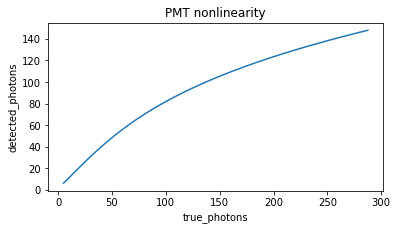

In [105]:
#plots
new_y = list(range(6,149))
new_x = []
for i in new_y:
    new_x.append(comp.correct_PMT_nonlinearity(i, y, x))

fig, ax = plotting.plot_pmt_nonlinearity(new_x, new_y)



In [ ]:
#data output
